In [10]:
import tensorflow as tf

# Path ke folder utama dataset
dataset_path = "dataset/CODELAB"

# === Preprocessing Data ===

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
test_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 640 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


# === Build CNN Model ===

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

d:\UMM\KULIAH\KULIAH smstr 7\Pembelajaran Mesin\Praktikum\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

# === Compile model ===

In [4]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# === Train model ===

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

epochs = 20

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stop]
)

d:\UMM\KULIAH\KULIAH smstr 7\Pembelajaran Mesin\Praktikum\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 616ms/step - accuracy: 0.5797 - loss: 0.7425 - val_accuracy: 0.5437 - val_loss: 0.6558
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step - accuracy: 0.7391 - loss: 0.5640 - val_accuracy: 0.8250 - val_loss: 0.4036
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 403ms/step - accuracy: 0.8531 - loss: 0.3428 - val_accuracy: 0.8813 - val_loss: 0.2827
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 408ms/step - accuracy: 0.8844 - loss: 0.2798 - val_accuracy: 0.8313 - val_loss: 0.3708
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 388ms/step - accuracy: 0.9328 - loss: 0.1959 - val_accuracy: 0.9125 - val_loss: 0.2320
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 371ms/step - accuracy: 0.9281 - loss: 0.1583 - val_accuracy: 0.9250 - val_loss: 0.2359
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step - accuracy: 0.9609 - loss: 0.1124 - val_accuracy: 0.9312 - val_loss: 0.2220
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 442ms/step - accuracy: 0.9750 - loss: 0.0747 - val_accuracy: 0

# === Evaluate model ===

In [6]:
loss, accuracy = model.evaluate(validation_generator)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9312 - loss: 0.2220
Test Loss: 0.2220
Test Accuracy: 0.9312


# === Fungsi Klasifikasi Citra ===

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def classify_new_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    probability = prediction[0][0]

    if probability > 0.5:
        predicted_class = 'Car'
        confidence = probability * 100
    else:
        predicted_class = 'Bike'
        confidence = (1 - probability) * 100

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


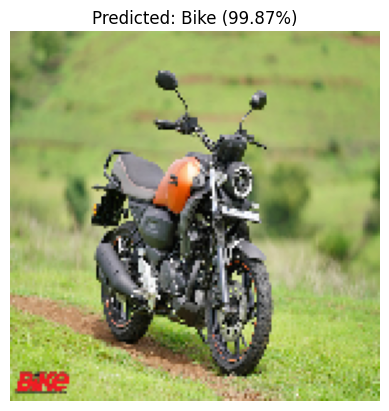

Hasil Prediksi: Bike (99.87%)


In [9]:
image_to_classify = 'Dataset/Bike/Bike (1).jpg'
predicted_label, confidence = classify_new_image(image_to_classify)
print(f"Hasil Prediksi: {predicted_label} ({confidence:.2f}%)")